# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html=browser.html
soup = BeautifulSoup(html, 'html.parser')

In [5]:
# Extract all rows of data
table = soup.find('table', class_='table')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

https://www.freecodecamp.org/news/python-split-string-how-to-split-a-string-into-a-list-or-array-in-python/#:~:text=The%20split()%20method%20is,a%20list%20of%20these%20substrings.&text=In%20this%20example%2C%20we%20split,using%20the%20split()%20method.

checked syntax for splitting at this site

In [6]:
# Create an empty list
table_data = []
# Loop through the scraped data to create a list of rows
rows = table.find_all('tr', class_='data-row')
for row in rows:
    table_data.append(row.text.split())


In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
columns = table.find('tr')
columns = columns.text.split()

Mars_temp_df = pd.DataFrame(table_data, columns=columns)

In [23]:
# Confirm DataFrame was created successfully
Mars_temp_df.head(50)

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
5,57,2012-08-21,15,158,6,-78.0,740.0
6,68,2012-08-22,16,158,6,-77.0,740.0
7,79,2012-08-23,17,159,6,-76.0,742.0
8,112,2012-08-27,21,161,6,-74.0,741.0
9,114,2012-08-28,22,162,6,-74.0,742.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [24]:
# Examine data type of each column
Mars_temp_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [25]:
# Change data types for data analysis
Mars_temp_df['sol']=Mars_temp_df['sol'].astype('int64')
Mars_temp_df['ls']=Mars_temp_df['ls'].astype('int64')
Mars_temp_df['month']=Mars_temp_df['month'].astype('int64')
Mars_temp_df['min_temp']=Mars_temp_df['min_temp'].astype('float64')
Mars_temp_df['pressure']=Mars_temp_df['pressure'].astype('float64')
Mars_temp_df['terrestrial_date'] = pd.to_datetime(Mars_temp_df['terrestrial_date'])

In [26]:
# Confirm type changes were successful by examining data types again
Mars_temp_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [27]:
# 1. How many months are there on Mars?
Mars_temp_df['month'].value_counts()


month
4     194
3     192
2     178
1     174
12    166
5     149
6     147
7     142
8     141
11    138
9     134
10    112
Name: count, dtype: int64

In [28]:
print("There are 12 months on Mars")

There are 12 months on Mars


In [29]:
# 2. How many Martian days' worth of data are there?
Mars_temp_df['sol'].count()


1867

In [30]:
# 3. What is the average low temperature by month?
Mars_avgs = Mars_temp_df.groupby(['month']).mean()
Mars_avgs

,id,terrestrial_date,sol,ls,min_temp,pressure
month,,,,,,
1,inf,2015-08-17 18:53:47.586206976,1077.574713,15.281609,-77.160920,862.488506
2,inf,2015-11-26 18:12:08.089887744,1175.853933,44.258427,-79.932584,889.455056
3,inf,2015-12-26 02:30:00.000000000,1204.406250,75.010417,-83.307292,877.322917
4,inf,2016-02-05 07:32:47.010309376,1244.500000,104.365979,-82.747423,806.329897
5,inf,2015-12-03 19:19:43.892617472,1182.691275,132.885906,-79.308725,748.557047
6,inf,2014-09-16 01:18:22.040816384,750.829932,164.897959,-75.299320,745.054422
7,inf,2014-08-10 08:16:54.084507136,715.105634,194.894366,-72.281690,795.105634
8,inf,2014-10-31 18:53:37.021276672,795.333333,224.347518,-68.382979,873.829787
9,inf,2015-01-07 11:06:16.119403008,861.186567,254.052239,-69.171642,913.305970


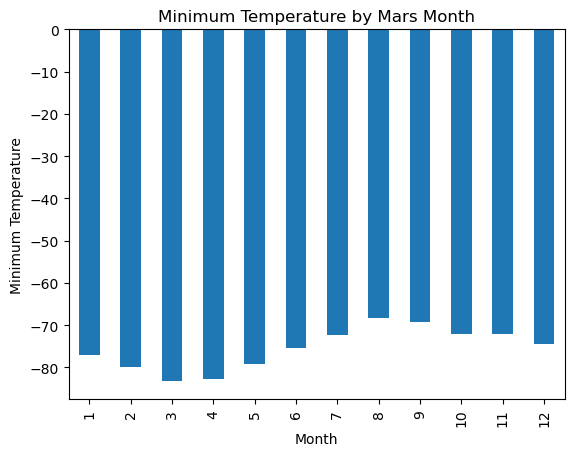

In [31]:
# Plot the average temperature by month
Mars_avgs['min_temp'].plot(kind="bar")

plt.title('Minimum Temperature by Mars Month')
plt.xlabel('Month')
plt.ylabel('Minimum Temperature')
plt.show()

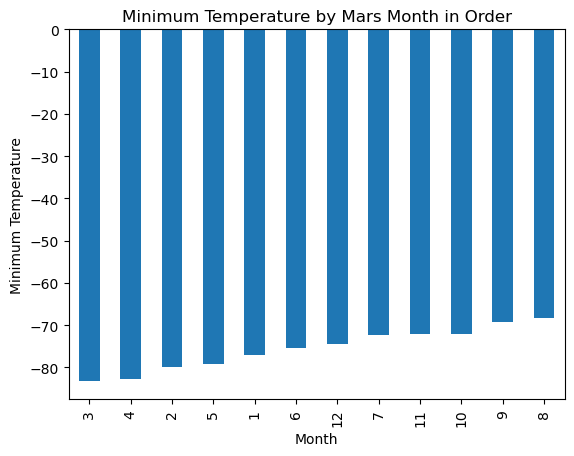

In [32]:
# Identify the coldest and hottest months in Curiosity's location
sorted_avgs = Mars_avgs.sort_values(by='min_temp', ascending=True)
sorted_avgs['min_temp'].plot(kind='bar')
plt.title('Minimum Temperature by Mars Month in Order')
plt.xlabel('Month')
plt.ylabel('Minimum Temperature')
plt.show()

In [33]:
print("The coldest month is the 3rd month, and the warmest month is the 8th month.")

The coldest month is the 3rd month, and the warmest month is the 8th month.


In [34]:
# 4. Average pressure by Martian month
Mars_avgs

,id,terrestrial_date,sol,ls,min_temp,pressure
month,,,,,,
1,inf,2015-08-17 18:53:47.586206976,1077.574713,15.281609,-77.160920,862.488506
2,inf,2015-11-26 18:12:08.089887744,1175.853933,44.258427,-79.932584,889.455056
3,inf,2015-12-26 02:30:00.000000000,1204.406250,75.010417,-83.307292,877.322917
4,inf,2016-02-05 07:32:47.010309376,1244.500000,104.365979,-82.747423,806.329897
5,inf,2015-12-03 19:19:43.892617472,1182.691275,132.885906,-79.308725,748.557047
6,inf,2014-09-16 01:18:22.040816384,750.829932,164.897959,-75.299320,745.054422
7,inf,2014-08-10 08:16:54.084507136,715.105634,194.894366,-72.281690,795.105634
8,inf,2014-10-31 18:53:37.021276672,795.333333,224.347518,-68.382979,873.829787
9,inf,2015-01-07 11:06:16.119403008,861.186567,254.052239,-69.171642,913.305970


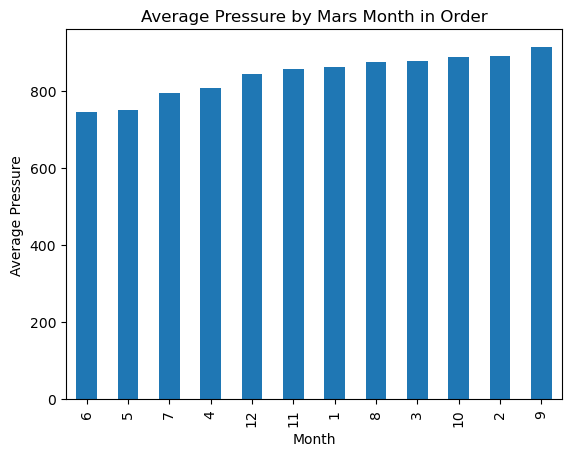

In [35]:
# Plot the average pressure by month
sorted_avgP = Mars_avgs.sort_values(by='pressure', ascending=True)
sorted_avgP['pressure'].plot(kind='bar')
plt.title('Average Pressure by Mars Month in Order')
plt.xlabel('Month')
plt.ylabel('Average Pressure')
plt.show()

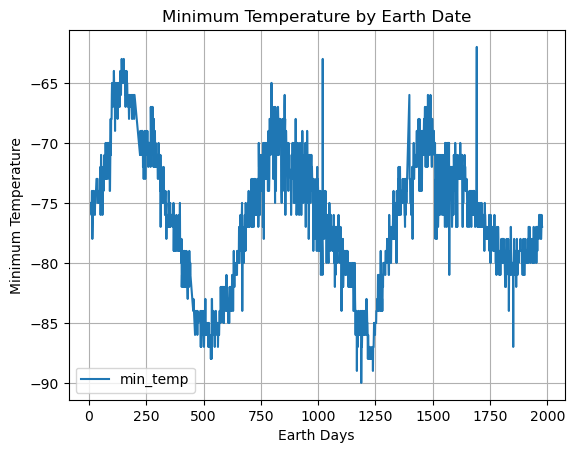

In [36]:
# 5. How many terrestrial (earth) days are there in a Martian year?

# get first date in dataset stored as a variable
first_date = Mars_temp_df['terrestrial_date'].iloc[0]
first_mars_date = Mars_temp_df['sol'].iloc[0]


#calculate number of days into the dataset into a new column of Mars_temp_df
Mars_temp_df['Earth Days Elapsed']=Mars_temp_df['terrestrial_date'] - first_date


Mars_temp_df.plot(x='sol', y='min_temp', kind='line', label=None, grid=True)

plt.title('Minimum Temperature by Earth Date')
plt.xlabel('Earth Days')
plt.ylabel('Minimum Temperature')
plt.show()


The peaks in temperature seem to occur with regular spacing.  Perhaps between 600 to 700 earth days.

In [37]:
# use loc to find only rows with min temp = -66 degrees

peak_temp_1= Mars_temp_df.loc[Mars_temp_df['min_temp']== -66,:]

peak_temp_1.head(60)

,id,terrestrial_date,sol,ls,month,min_temp,pressure,Earth Days Elapsed
86,3,2012-11-16,100,207,7,-66.0,829.0,92 days
89,6,2012-11-19,103,209,7,-66.0,836.0,95 days
91,8,2012-11-21,105,211,8,-66.0,839.0,97 days
92,9,2012-11-23,106,211,8,-66.0,841.0,99 days
93,10,2012-11-24,107,212,8,-66.0,844.0,100 days
97,15,2012-11-28,111,214,8,-66.0,849.0,104 days
99,17,2012-11-30,113,216,8,-66.0,857.0,106 days
101,19,2012-12-02,115,217,8,-66.0,857.0,108 days
103,21,2012-12-04,117,218,8,-66.0,861.0,110 days
105,23,2012-12-06,119,219,8,-66.0,866.0,112 days


774	798	2014-12-31	854	262	9	-66.0	910.0	867 days
1292	1318	2016-07-12	1398	184	7	-66.0	751.0	1426 days

Looks like the 2nd and 3rd peaks occur around 8oo earth days and 1500 earth days.
1500-800 = 700

The first peak is around 100 days .
800 - 100 =700   
A round number for the earth days in a Martian year is 700

In [38]:
print("Based on averages, the coldest month is the 3rd month, and the warmest month is the 8th month on Mars.")

print("Again based on averages, the lowest pressures on Mars occur during the 6th month, with the highest pressures during the 9th pmonth.")

print("A Martian year is approximately 700 days long.  This is the approximate time span between temperature peaks over multiple Martian years.")

Based on averages, the coldest month is the 3rd month, and the warmest month is the 8th month on Mars.
Again based on averages, the lowest pressures on Mars occur during the 6th month, with the highest pressures during the 9th pmonth.
A Martian year is approximately 700 days long.  This is the approximate time span between temperature peaks over multiple Martian years.


Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [39]:
# Write the data to a CSV
Mars_temp_df.to_csv("output/marstemps.csv",index=False)

In [40]:
browser.quit()